# Notebook Summary
In this notebook I test various basic models on the data

In [1]:
import autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import Classes

In [2]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['retina']
%matplotlib inline
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Pickle in Data

In [3]:
# Pickle in cleaned dataframe

# Designate path

path = r"C:\Users\Andrew\Documents\Metis\TikTok_Song_Predictor\Pickle\df_agg.pkl"

df = pickle.load(open(path,'rb'))
df.head(2)

level_0  danceability  energy  key  loudness  mode  speechiness  \
0        0         0.880   0.501  2.0    -6.774   1.0        0.062   
1      162         0.935   0.454  1.0    -7.509   1.0        0.375   

   acousticness  instrumentalness  liveness  ...  \
0        0.0494            0.0695    0.4360  ...   
1        0.0194            0.0000    0.0824  ...   

                                         TikTok Link  Release Date  \
0  https://www.tiktok.com/music/All-TikTok-Mashup...    2020-08-17   
1  https://www.tiktok.com/music/WAP-Megan-Thee-St...    2018-03-22   

  Position Change             spotify_uri  \
0            23.0  5TpvLkESnw1g9wDz52efeO   
1            15.0  4Oun2ylbjFKMPTiaSbbCih   

                                      audio_analysis  \
0  {'meta': {'analyzer_version': '4.0.0', 'platfo...   
1  {'meta': {'analyzer_version': '4.0.0', 'platfo...   

                                    feature_analysis success    year  \
0  {'danceability': 0.88, 'energy': 0.501, 'key':...       1  2020.0   
1  {'danceability': 0.935, 'energy': 0.454, 'key'...       1  2018.0   

   top_albums top_artists  
0       Other       Other  
1       Other     Cardi B  

[2 rows x 45 columns]

# Exploratory

In [4]:
df.columns

Index(['level_0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'ISRC', 'index', 'Playlist Add Date',
       'Record Label', 'UPC', 'Album Name', 'name', 'Peak Position',
       'Peak Date', 'Rank', 'Historical Positions', 'Time on Chart',
       'Artist(s)', 'tiktok_track_id', 'Velocity', 'Historical Posts',
       'TikTok Link', 'Release Date', 'Position Change', 'spotify_uri',
       'audio_analysis', 'feature_analysis', 'success', 'year', 'top_albums',
       'top_artists'],
      dtype='object')

In [5]:
# Seperate features from label

df_plot = df.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature','Album Name','Artist(s)', 'year', 'success']]

In [6]:
def plot_features(df, sample_size=1000):
    # We don't need to plot the id
    sample = df.drop(['Album Name','Artist(s)'], axis=1) \
                .sample(sample_size, random_state=44)

    g = sns.pairplot(sample, hue='success', plot_kws=dict(alpha=.3, edgecolor='none'))

<Figure size 1440x720 with 0 Axes>

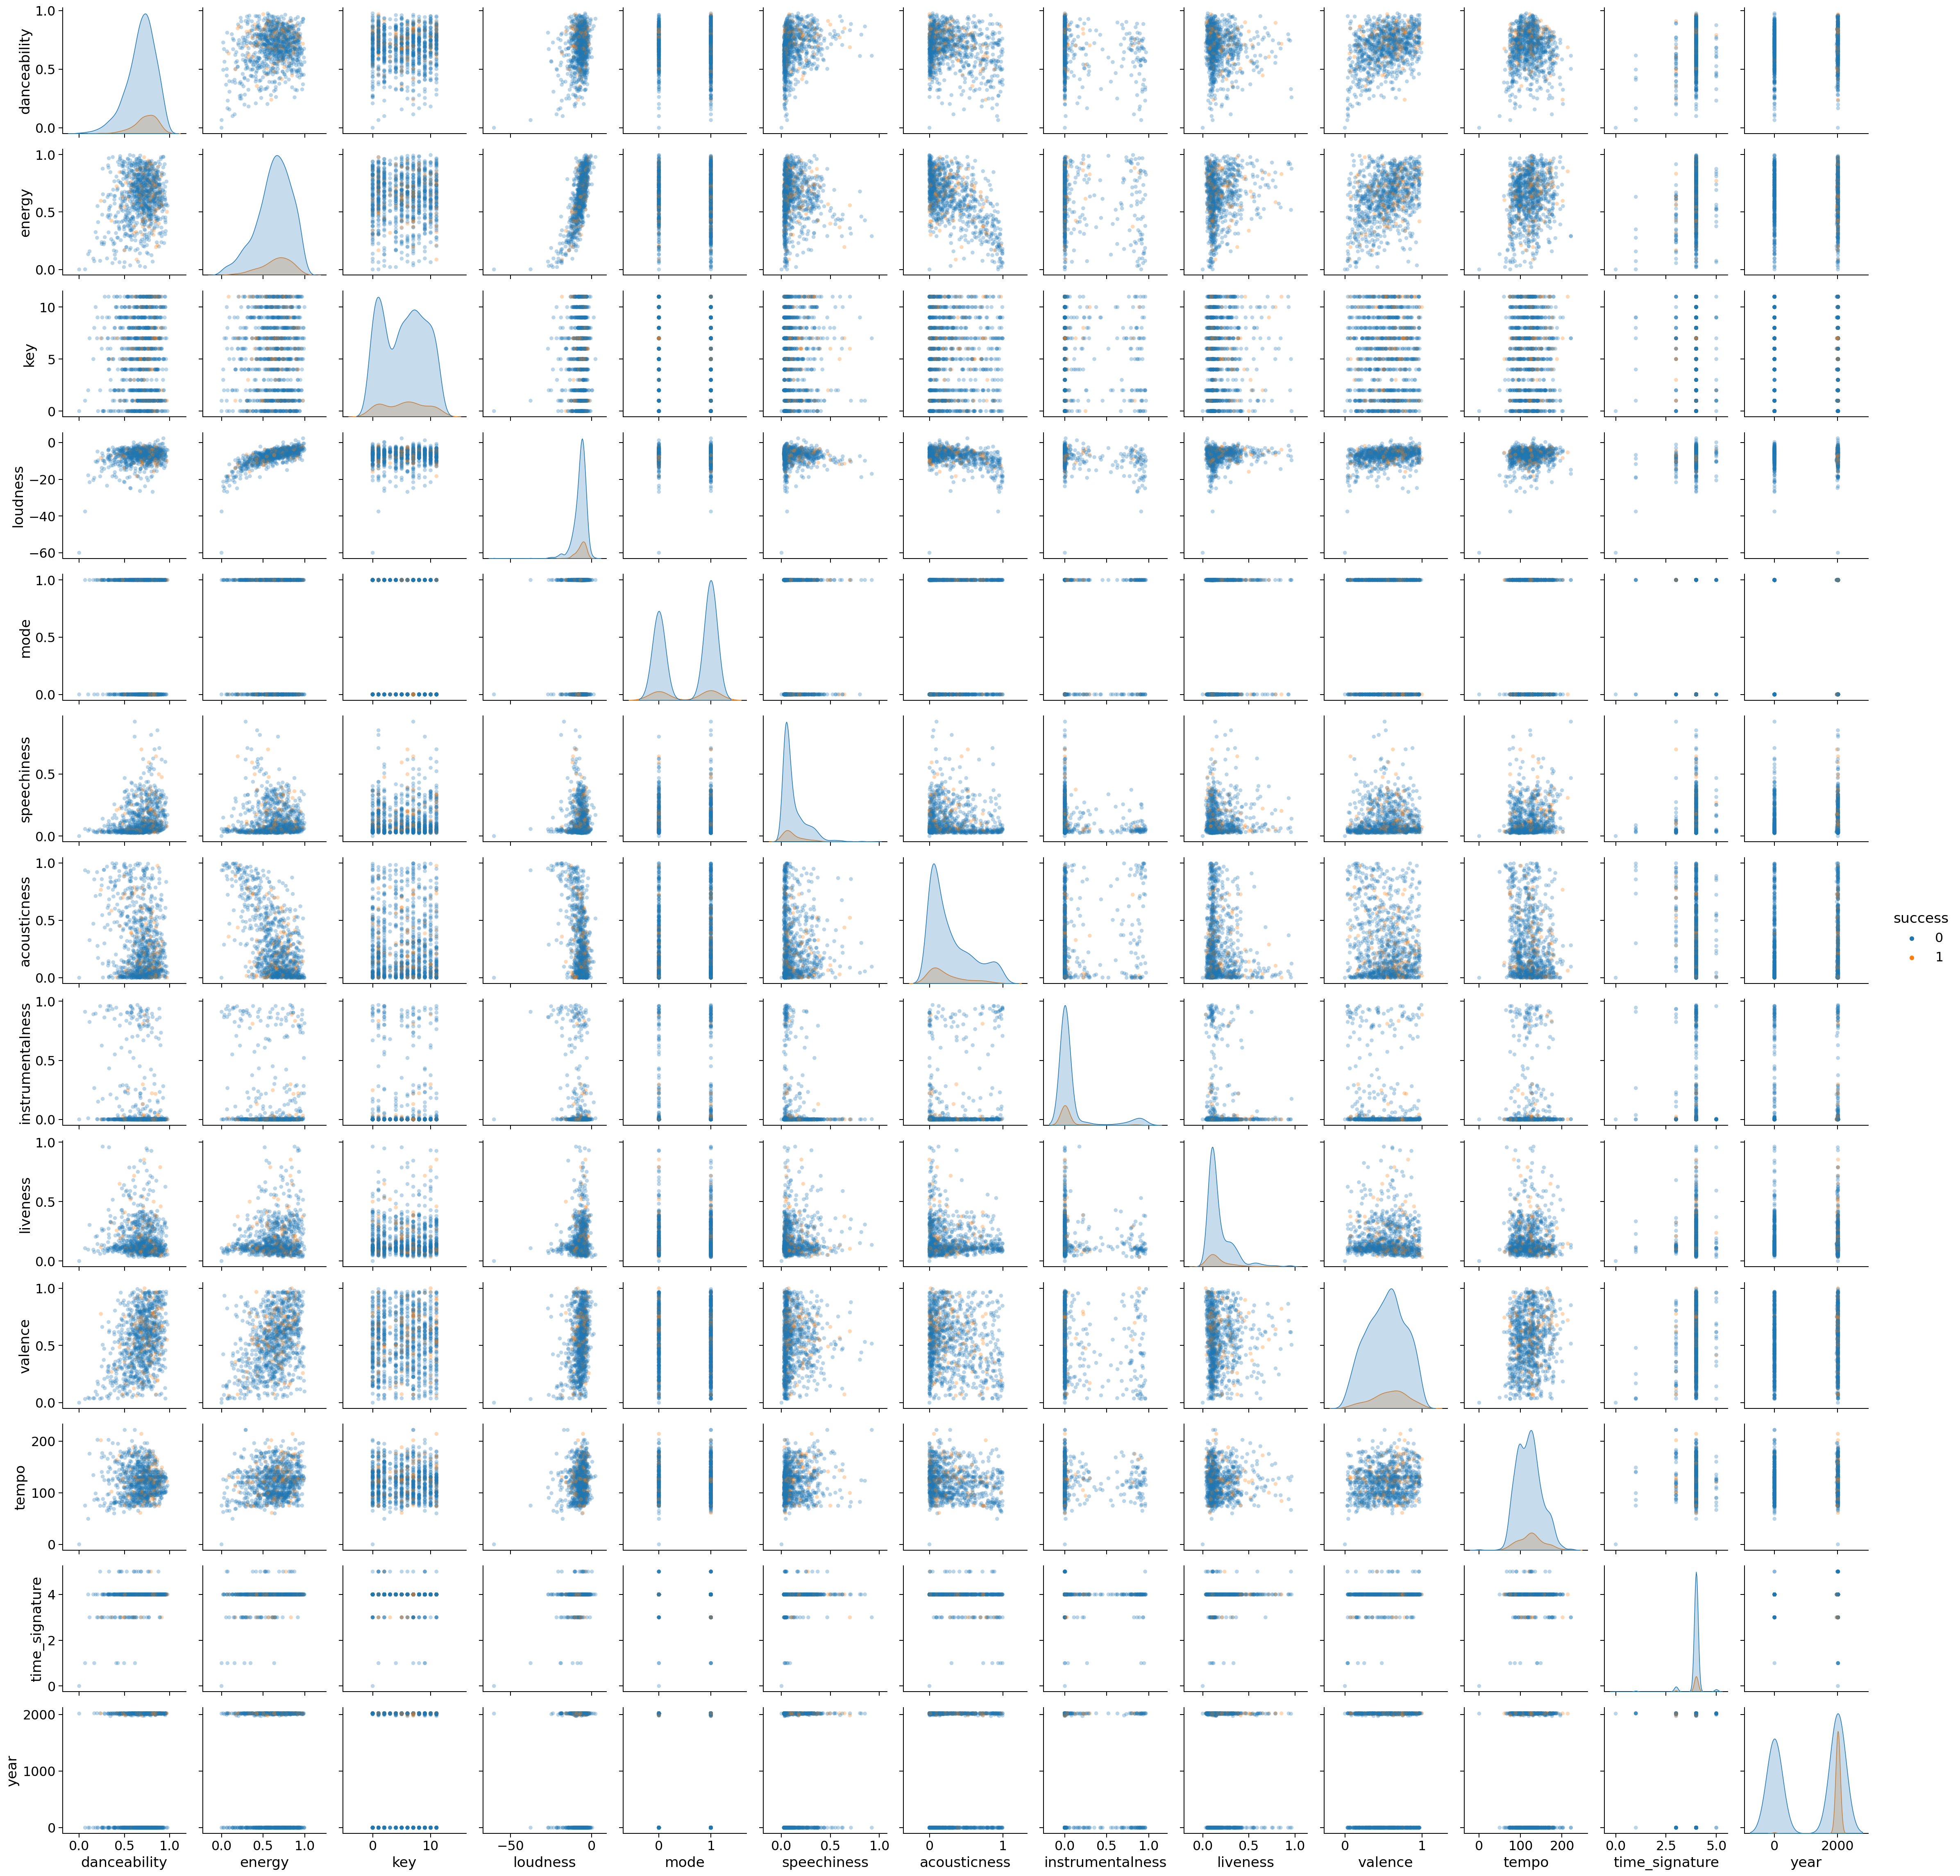

In [7]:
f = plt.figure(figsize=(20,10))
sns.set_context('paper',font_scale = 1.8)

ax = plot_features(df_plot)

There appears to be minimal separation between the classes

# 1) Initial Logistic Regression

In [32]:
# Seperate features from label

X = df.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature','Album Name','Artist(s)', 'year']]

y = df['success']

In [33]:
# Get dummy varialbes
Classes.gnumeric_func(X, ['Artist(s)','Album Name'])

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.880  0.5010  2.0    -6.774   1.0       0.0620      0.049400   
1            0.935  0.4540  1.0    -7.509   1.0       0.3750      0.019400   
2            0.842  0.5970  2.0    -6.336   1.0       0.0627      0.002520   
3            0.884  0.5460  2.0    -6.279   0.0       0.1170      0.269000   
4            0.926  0.7620  1.0    -1.887   1.0       0.2050      0.000718   
...            ...     ...  ...       ...   ...          ...           ...   
7670         0.626  0.4150  2.0   -12.073   1.0       0.6030      0.559000   
7671         0.672  0.0304  2.0   -26.380   1.0       0.0381      0.288000   
7672         0.879  0.6420  0.0    -6.775   1.0       0.0570      0.096800   
7673         0.649  0.9310  1.0    -3.150   0.0       0.1810      0.009300   
7674         0.509  0.8640  0.0    -3.903   1.0       0.0424      0.023200   

      instrumentalness  liveness  valence    tempo  time_signature  \
0             0.069500    0.4360   0.4590  120.038             4.0   
1             0.000000    0.0824   0.3570  133.073             4.0   
2             0.000000    0.1240   0.2980  145.992             4.0   
3             0.000008    0.0640   0.4900  113.236             3.0   
4             0.000000    0.1170   0.2770  127.931             4.0   
...                ...       ...      ...      ...             ...   
7670          0.000000    0.0931   0.5940   99.609             4.0   
7671          0.865000    0.0676   0.0682   90.037             4.0   
7672          0.000002    0.1300   0.7420  129.938             4.0   
7673          0.000000    0.7510   0.7440  153.645             4.0   
7674          0.000001    0.1070   0.5580  170.094             4.0   

      Album Name  Artist(s)    year  
0              0          0  2020.0  
1              1          1  2018.0  
2              2          2  2018.0  
3              3          3  2020.0  
4              4          4  2020.0  
...          ...        ...     ...  
7670        7338       1259     0.0  
7671        7339       2637     0.0  
7672        7340       5394     0.0  
7673        7341         20     0.0  
7674        7342       5395     0.0  

[7675 rows x 15 columns]

In [34]:
#Split data into 3: 60% train, 20% validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,stratify=y_train)

In [35]:
# Scale features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [36]:
# run initial logistic regression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_val)

#scores
print("Scores for the logisitc regression")
print("Training score: {:6.2f}%".format(100*lr.score(X_train, y_train)))
print("Val set score: {:6.2f}%".format(100*lr.score(X_val, y_val)))

#precision/recall
print("\nPrecision / Recall val")
print("Val F1 score: {:6.2f}%".format(f1_score(lr.predict(X_val), y_val)))
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))

Scores for the logisitc regression
Training score:  98.00%
Val set score:  97.85%

Precision / Recall val
Val F1 score:   0.91%
Precision: 0.9286,   Recall: 0.8942


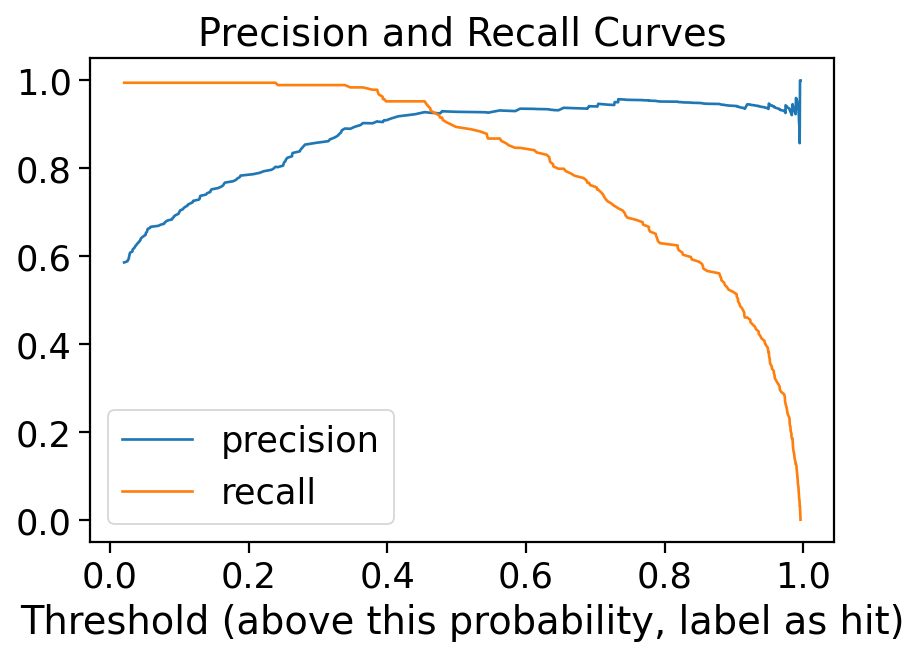

In [37]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, lr.predict_proba(X_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as hit)');
plt.title('Precision and Recall Curves');

## These initial results are okay - let's try oversampling 

In [38]:
# Seperate features from label

X = df.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature','Album Name','Artist(s)', 'year']]

y = df['success']

In [39]:
# Get dummy varialbes
Classes.gnumeric_func(X, ['Album Name','Artist(s)'])

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.880  0.5010  2.0    -6.774   1.0       0.0620      0.049400   
1            0.935  0.4540  1.0    -7.509   1.0       0.3750      0.019400   
2            0.842  0.5970  2.0    -6.336   1.0       0.0627      0.002520   
3            0.884  0.5460  2.0    -6.279   0.0       0.1170      0.269000   
4            0.926  0.7620  1.0    -1.887   1.0       0.2050      0.000718   
...            ...     ...  ...       ...   ...          ...           ...   
7670         0.626  0.4150  2.0   -12.073   1.0       0.6030      0.559000   
7671         0.672  0.0304  2.0   -26.380   1.0       0.0381      0.288000   
7672         0.879  0.6420  0.0    -6.775   1.0       0.0570      0.096800   
7673         0.649  0.9310  1.0    -3.150   0.0       0.1810      0.009300   
7674         0.509  0.8640  0.0    -3.903   1.0       0.0424      0.023200   

      instrumentalness  liveness  valence    tempo  time_signature  \
0             0.069500    0.4360   0.4590  120.038             4.0   
1             0.000000    0.0824   0.3570  133.073             4.0   
2             0.000000    0.1240   0.2980  145.992             4.0   
3             0.000008    0.0640   0.4900  113.236             3.0   
4             0.000000    0.1170   0.2770  127.931             4.0   
...                ...       ...      ...      ...             ...   
7670          0.000000    0.0931   0.5940   99.609             4.0   
7671          0.865000    0.0676   0.0682   90.037             4.0   
7672          0.000002    0.1300   0.7420  129.938             4.0   
7673          0.000000    0.7510   0.7440  153.645             4.0   
7674          0.000001    0.1070   0.5580  170.094             4.0   

      Album Name  Artist(s)    year  
0              0          0  2020.0  
1              1          1  2018.0  
2              2          2  2018.0  
3              3          3  2020.0  
4              4          4  2020.0  
...          ...        ...     ...  
7670        7338       1259     0.0  
7671        7339       2637     0.0  
7672        7340       5394     0.0  
7673        7341         20     0.0  
7674        7342       5395     0.0  

[7675 rows x 15 columns]

In [40]:
#Split data into 3: 60% train, 20% validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,stratify=y_train)

In [41]:
ada = ADASYN(random_state=42)

In [42]:
# Oversample training data
X_adasyn_tr, y_adasyn_tr = ada.fit_resample(X_train,y_train)

In [43]:
Counter(y_adasyn_tr)

Counter({1: 4040, 0: 4036})

In [44]:
# Scale features 
scaler = StandardScaler()
X_adasyn_tr = scaler.fit_transform(X_adasyn_tr)
X_val = scaler.transform(X_val)

In [45]:
# run logistic regression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_adasyn_tr, y_adasyn_tr)
y_predict = lr.predict(X_val)

#scores
print("Scores for the logisitc regression")
print("Training score: {:6.2f}%".format(100*lr.score(X_adasyn_tr, y_adasyn_tr)))
print("Val set score: {:6.2f}%".format(100*lr.score(X_val, y_val)))

#precision/recall
print("\nPrecision / Recall")
print("Val F1 score: {:6.2f}%".format(f1_score(lr.predict(X_val), y_val)))
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))

Scores for the logisitc regression
Training score:  97.96%
Val set score:  97.13%

Precision / Recall
Val F1 score:   0.90%
Precision: 0.8139,   Recall: 0.9947


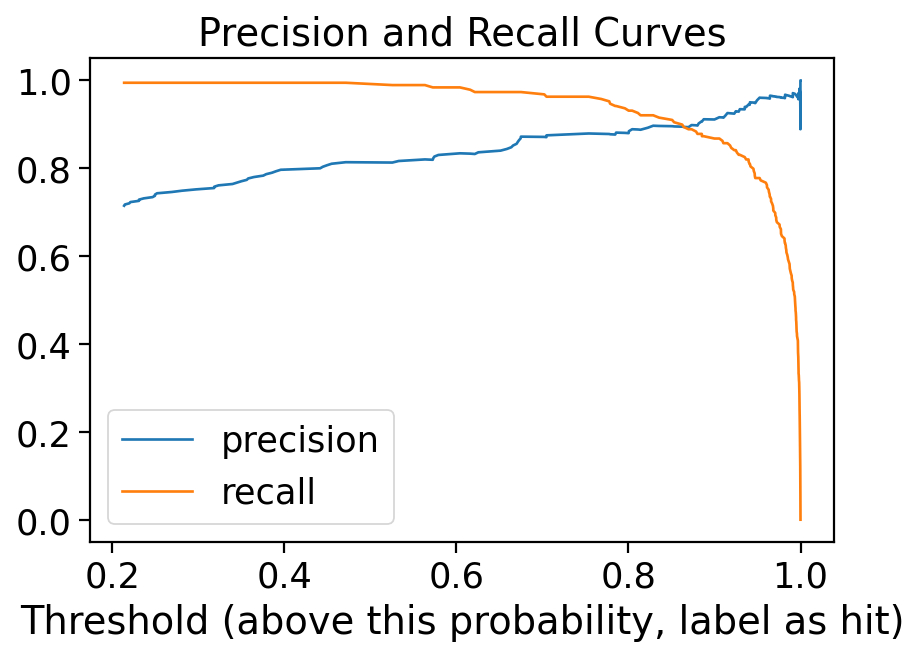

In [47]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val, lr.predict_proba(X_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as hit)');
plt.title('Precision and Recall Curves');

# Appling PCA & Oversampling

In [48]:
# Seperate features from label

X = df.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature','top_albums','top_artists', 'year']]

y = df['success']

In [49]:
# Get dummies for "Album Name" and "Artist(S)"

X = pd.get_dummies(X, prefix=['top_albums','top_artists'])

In [50]:
# Oversample

#Split data into 3: 60% train, 20% validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,stratify=y_train)

ada = ADASYN(random_state=42)

# Oversample training data
X_adasyn_tr, y_adasyn_tr = ada.fit_resample(X_train,y_train)

In [51]:
# Scale features 
scaler = StandardScaler()
X_adasyn_tr = scaler.fit_transform(X_adasyn_tr)
X_val = scaler.transform(X_val)

In [52]:
# Determining number of PCA components for 95% of variation
pca = PCA()
X_pca = pca.fit_transform(X_adasyn_tr)
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance >= .95])
n_to_reach_95 = X.shape[1] - n_over_95 + 1

In [53]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression()
pca = PCA(n_components=n_to_reach_95)

In [54]:
# fit logistic regression and pca
X_pca_train = pca.fit_transform(X_adasyn_tr)
lr.fit(X_pca_train, y_adasyn_tr) # fit to train

LogisticRegression(max_iter=10000)

In [55]:
# transform val data with pca

X_val_pca = pca.transform(X_val)

In [56]:
# Test regression
y_predict = lr.predict(X_val_pca)

#scores
print("Scores for the logisitc regression")
print("Training score: {:6.2f}%".format(100*lr.score(X_pca_train, y_adasyn_tr)))
print("Val set score: {:6.2f}%".format(100*lr.score(X_pca_train, y_adasyn_tr)))

#precision/recall
print("\nPrecision / Recall")
print("Val F1 score: {:6.2f}%".format(f1_score(lr.predict(X_val_pca), y_val)))
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_val, y_predict), 
                                                     recall_score(y_val, y_predict)))

Scores for the logisitc regression
Training score:  75.46%
Val set score:  75.46%

Precision / Recall
Val F1 score:   0.35%
Precision: 0.2205,   Recall: 0.8263


Turns out the lr does not perform as well with pca